In [2]:
import pandas as pd

In [3]:
corona_data = pd.read_csv('2019_nCoV_20200121_20200206.csv')

In [4]:
corona_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,2/5/20 16:43,16678.0,NaN,538.0,479.0
1,Guangdong,Mainland China,2/5/20 13:23,895.0,NaN,49.0,0.0
2,Zhejiang,Mainland China,2/5/20 15:13,895.0,NaN,78.0,0.0
3,Henan,Mainland China,2/5/20 15:03,764.0,NaN,47.0,2.0
4,Hunan,Mainland China,2/5/20 15:23,661.0,NaN,54.0,0.0


In [5]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 7 columns):
Province/State    1418 non-null object
Country/Region    1877 non-null object
Last Update       1877 non-null object
Confirmed         1847 non-null float64
Suspected         88 non-null float64
Recovered         1001 non-null float64
Death             878 non-null float64
dtypes: float64(4), object(3)
memory usage: 102.7+ KB


In [6]:
corona_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Confirmed,1847.0,165.615051,1031.373752,1.0,2.0,10.0,64.0,16678.0
Suspected,88.0,22.613636,48.177696,1.0,1.0,4.0,22.0,244.0
Recovered,1001.0,8.625375,39.719850,0.0,0.0,1.0,4.0,538.0
Death,878.0,7.463554,46.182133,0.0,0.0,0.0,1.0,479.0


In [7]:
import seaborn as snp

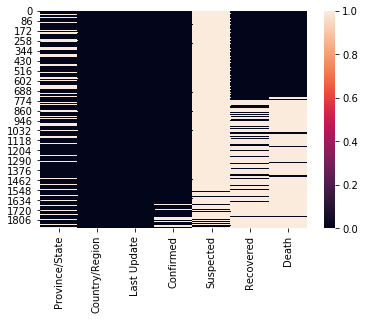

In [8]:
snp.heatmap(corona_data.isnull())

In [9]:
corona_data['Province/State'].fillna('Other', inplace=True)

In [10]:
corona_data.fillna(value=0.0, inplace=True)

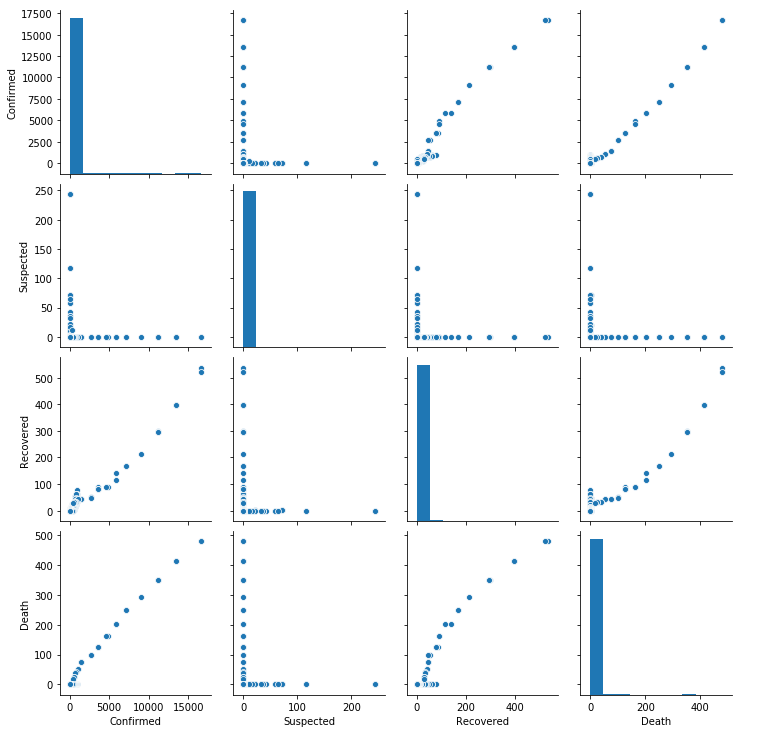

In [11]:
snp.pairplot(corona_data)

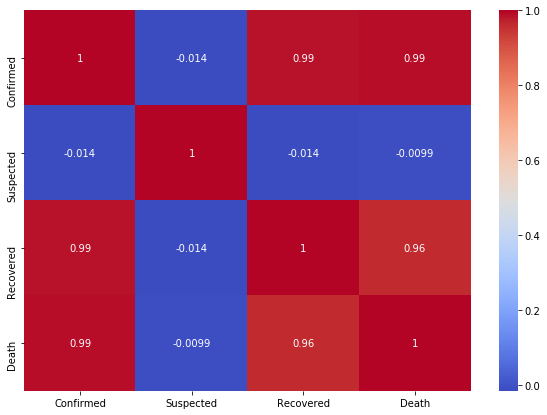

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
snp.heatmap(corona_data.corr(), annot=True, cmap='coolwarm')

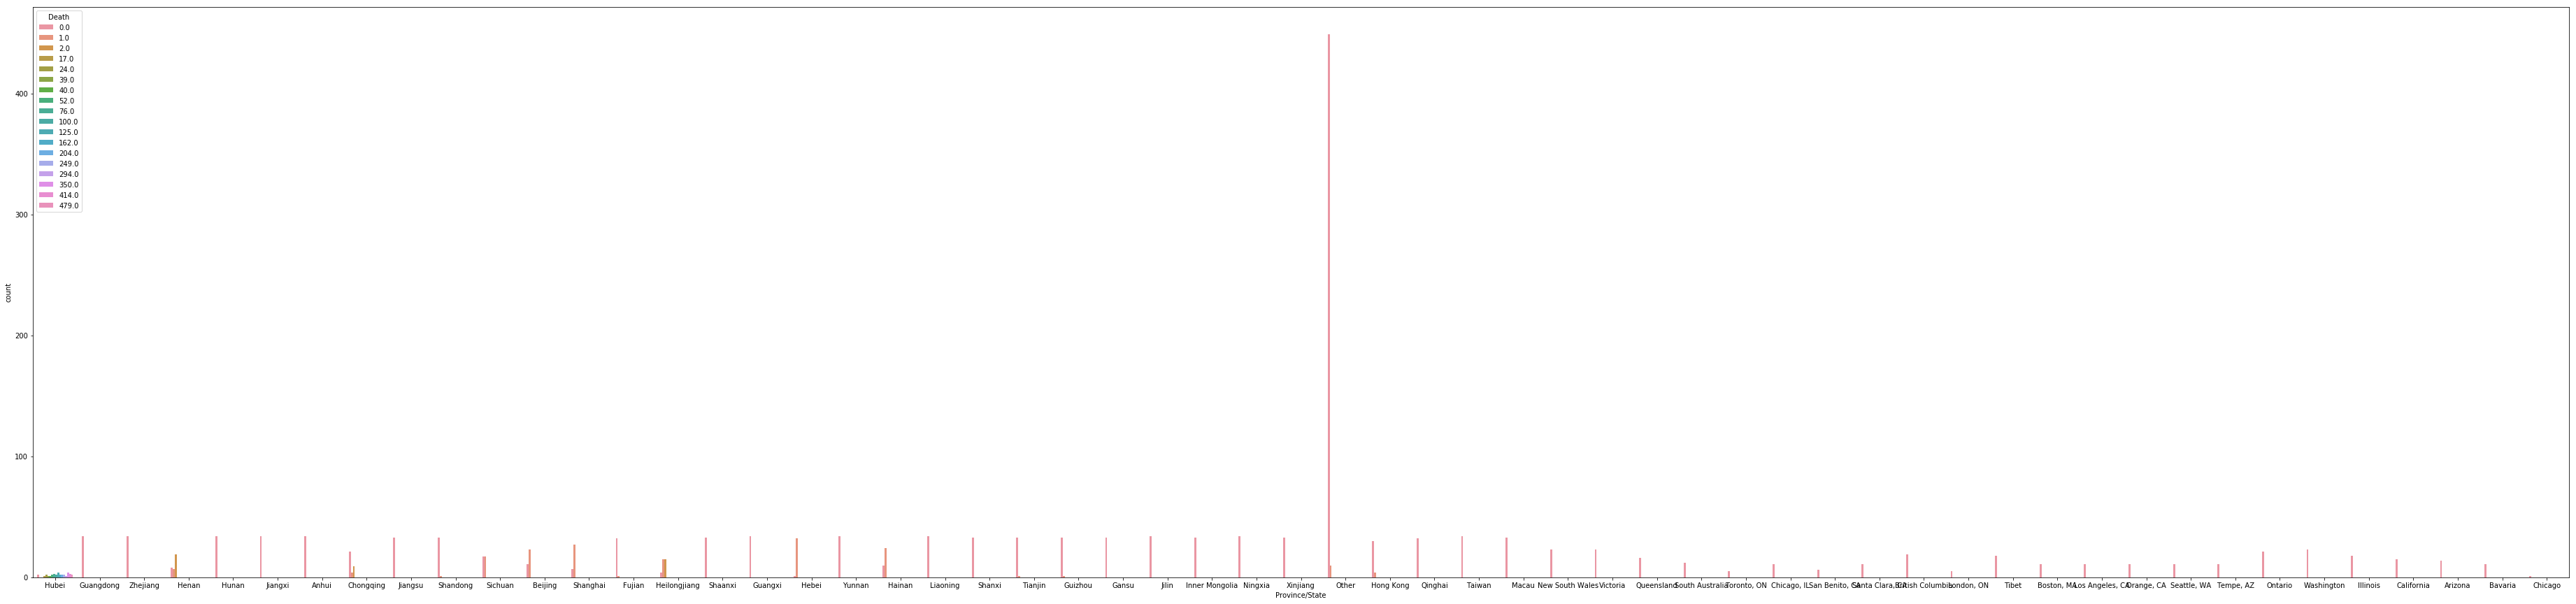

In [13]:
plt.figure(figsize=(65,15))
snp.countplot('Province/State', hue='Death', data=corona_data)

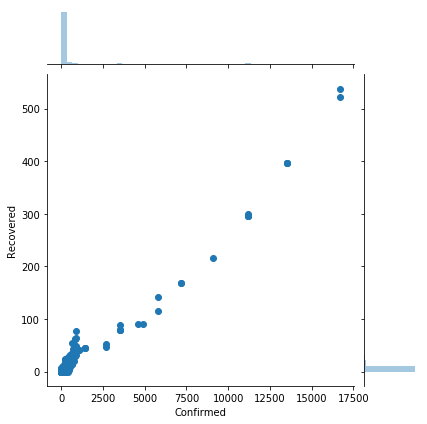

In [14]:
snp.jointplot(x='Confirmed', y='Recovered', data=corona_data)

In [15]:
corona_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,2/5/20 16:43,16678.0,0.0,538.0,479.0
1,Guangdong,Mainland China,2/5/20 13:23,895.0,0.0,49.0,0.0
2,Zhejiang,Mainland China,2/5/20 15:13,895.0,0.0,78.0,0.0
3,Henan,Mainland China,2/5/20 15:03,764.0,0.0,47.0,2.0
4,Hunan,Mainland China,2/5/20 15:23,661.0,0.0,54.0,0.0


In [16]:
corona_data['Last Update'] = pd.to_datetime(corona_data['Last Update'])

In [17]:
import datetime
corona_data['month'] = pd.DatetimeIndex(corona_data['Last Update']).month
corona_data['year'] = pd.DatetimeIndex(corona_data['Last Update']).year
corona_data['day'] = pd.DatetimeIndex(corona_data['Last Update']).day
corona_data['time'] = pd.DatetimeIndex(corona_data['Last Update']).time

In [18]:
corona_data.drop('Last Update', axis=1, inplace=True)

In [19]:
corona_data.head()

,Province/State,Country/Region,Confirmed,Suspected,Recovered,Death,month,year,day,time
0,Hubei,Mainland China,16678.0,0.0,538.0,479.0,2,2020,5,16:43:00
1,Guangdong,Mainland China,895.0,0.0,49.0,0.0,2,2020,5,13:23:00
2,Zhejiang,Mainland China,895.0,0.0,78.0,0.0,2,2020,5,15:13:00
3,Henan,Mainland China,764.0,0.0,47.0,2.0,2,2020,5,15:03:00
4,Hunan,Mainland China,661.0,0.0,54.0,0.0,2,2020,5,15:23:00


In [20]:
from sklearn.model_selection import train_test_split

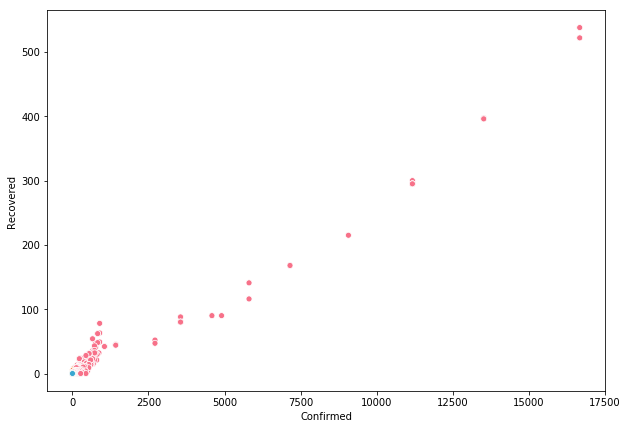

In [21]:
plt.figure(figsize=(10,7))
snp.scatterplot(x='Confirmed', y='Recovered', hue='Country/Region',data=corona_data, legend=False)

In [22]:
X = corona_data.drop(['Province/State','Country/Region', 'time', 'Death'], axis=1)
y = corona_data['Death']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
reg_model_pred = reg.predict(X_test) 

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report

In [28]:
mean_absolute_error(y_test, reg_model_pred)

2.3144986918830166

In [29]:
mean_squared_error(y_test, reg_model_pred)

15.631491871836324

In [30]:
import numpy as np
np.sqrt(mean_squared_error(y_test, reg_model_pred))

3.9536681539851477

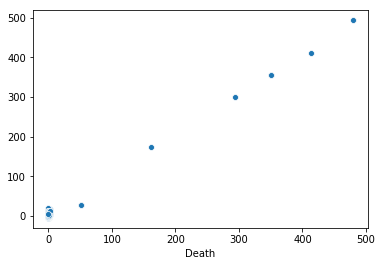

In [31]:
snp.scatterplot(x=y_test, y=reg_model_pred)

In [32]:
test_df = pd.DataFrame(data=[y_test, reg_model_pred])

In [33]:

test_df.head().transpose()

,Death,Unnamed 0
1111,1.0,NaN
1448,0.0,NaN
1326,0.0,NaN
807,0.0,NaN
270,0.0,-2.051392
865,0.0,NaN
887,0.0,NaN
1359,0.0,NaN
1811,0.0,NaN
1309,0.0,NaN


In [34]:
corona_data.head()

,Province/State,Country/Region,Confirmed,Suspected,Recovered,Death,month,year,day,time
0,Hubei,Mainland China,16678.0,0.0,538.0,479.0,2,2020,5,16:43:00
1,Guangdong,Mainland China,895.0,0.0,49.0,0.0,2,2020,5,13:23:00
2,Zhejiang,Mainland China,895.0,0.0,78.0,0.0,2,2020,5,15:13:00
3,Henan,Mainland China,764.0,0.0,47.0,2.0,2,2020,5,15:03:00
4,Hunan,Mainland China,661.0,0.0,54.0,0.0,2,2020,5,15:23:00


In [36]:
new_corona_data = corona_data.drop(['Province/State','Country/Region', 'time'], axis=1)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaled = StandardScaler()
scaled.fit(new_corona_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
scaled_data = scaled.transform(new_corona_data)

In [45]:
new_corona  = pd.DataFrame(data = scaled_data, columns=new_corona_data.columns)

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf_reg = RandomForestRegressor(n_estimators=100)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(new_corona.drop('Death', axis=1), new_corona['Death'], test_size=0.33, random_state=42)

In [52]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
rf_pred = rf_reg.predict(X_test)

In [55]:
mean_absolute_error(y_test, rf_pred)

0.011432783410033604

In [56]:
mean_squared_error(y_test, rf_pred)

0.0062086034750677786

In [57]:
np.sqrt(mean_squared_error(y_test, rf_pred))

0.0787946919219041

In [59]:
df = pd.DataFrame(data=y_test)

In [63]:
df['predicted_value'] = rf_pred

In [64]:
df

,Death,predicted_value
1111,-0.078373,-0.083092
1448,-0.109833,-0.109833
1326,-0.109833,-0.108889
807,-0.109833,-0.109833
270,-0.109833,-0.109833
865,-0.109833,-0.109833
887,-0.109833,-0.105114
1359,-0.109833,-0.109833
1811,-0.109833,-0.109833
1309,-0.109833,-0.109833


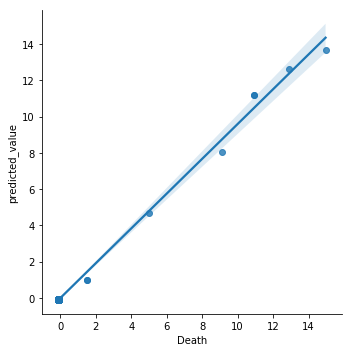

In [66]:
snp.lmplot(x='Death', y='predicted_value', data=df)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [70]:
model = Sequential()

model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [116]:
model.fit(x=X_train.values, y=y_train.values, validation_data=(X_test, y_test), epochs=450, verbose=1)

Train on 1257 samples, validate on 620 samples
Epoch 1/450
1257/1257 [==============================] - 0s 153us/sample - loss: 6.3820e-04 - val_loss: 3.4959e-04
Epoch 2/450
1257/1257 [==============================] - 0s 95us/sample - loss: 7.8465e-04 - val_loss: 3.5689e-04
Epoch 3/450
1257/1257 [==============================] - 0s 100us/sample - loss: 7.2041e-04 - val_loss: 3.8756e-04
Epoch 4/450
1257/1257 [==============================] - 0s 93us/sample - loss: 6.1458e-04 - val_loss: 8.0495e-04
Epoch 5/450
1257/1257 [==============================] - 0s 99us/sample - loss: 5.7741e-04 - val_loss: 3.9099e-04
Epoch 6/450
1257/1257 [==============================] - 0s 101us/sample - loss: 4.6669e-04 - val_loss: 7.9332e-04
Epoch 7/450
1257/1257 [==============================] - 0s 96us/sample - loss: 5.4613e-04 - val_loss: 0.0017
Epoch 8/450
1257/1257 [==============================] - 0s 98us/sample - loss: 7.9666e-04 - val_loss: 9.5102e-04
Epoch 9/450
1257/1257 [===================

1257/1257 [==============================] - 0s 122us/sample - loss: 6.0375e-04 - val_loss: 0.0020
Epoch 73/450
1257/1257 [==============================] - 0s 77us/sample - loss: 6.8612e-04 - val_loss: 4.8047e-04
Epoch 74/450
1257/1257 [==============================] - 0s 76us/sample - loss: 8.8030e-04 - val_loss: 5.1620e-04
Epoch 75/450
1257/1257 [==============================] - 0s 79us/sample - loss: 8.6764e-04 - val_loss: 5.6872e-04
Epoch 76/450
1257/1257 [==============================] - 0s 80us/sample - loss: 6.5044e-04 - val_loss: 0.0012
Epoch 77/450
1257/1257 [==============================] - 0s 109us/sample - loss: 4.7063e-04 - val_loss: 5.7870e-04
Epoch 78/450
1257/1257 [==============================] - 0s 97us/sample - loss: 4.6003e-04 - val_loss: 8.3307e-04
Epoch 79/450
1257/1257 [==============================] - 0s 77us/sample - loss: 4.0897e-04 - val_loss: 3.8642e-04
Epoch 80/450
1257/1257 [==============================] - 0s 75us/sample - loss: 4.5218e-04 - val_l

Epoch 144/450
1257/1257 [==============================] - 0s 137us/sample - loss: 3.7715e-04 - val_loss: 5.2388e-04
Epoch 145/450
1257/1257 [==============================] - 0s 82us/sample - loss: 4.5718e-04 - val_loss: 5.4698e-04
Epoch 146/450
1257/1257 [==============================] - 0s 87us/sample - loss: 4.1113e-04 - val_loss: 6.5360e-04
Epoch 147/450
1257/1257 [==============================] - 0s 106us/sample - loss: 3.4266e-04 - val_loss: 4.2680e-04
Epoch 148/450
1257/1257 [==============================] - 0s 163us/sample - loss: 3.4842e-04 - val_loss: 3.3364e-04
Epoch 149/450
1257/1257 [==============================] - 0s 131us/sample - loss: 4.2181e-04 - val_loss: 5.5441e-04
Epoch 150/450
1257/1257 [==============================] - 0s 92us/sample - loss: 9.9553e-04 - val_loss: 3.6938e-04
Epoch 151/450
1257/1257 [==============================] - 0s 89us/sample - loss: 8.2923e-04 - val_loss: 4.2087e-04
Epoch 152/450
1257/1257 [==============================] - 0s 97us/s

Epoch 215/450
1257/1257 [==============================] - 0s 89us/sample - loss: 5.8361e-04 - val_loss: 0.0023
Epoch 216/450
1257/1257 [==============================] - 0s 85us/sample - loss: 4.6846e-04 - val_loss: 4.1802e-04
Epoch 217/450
1257/1257 [==============================] - 0s 99us/sample - loss: 4.5802e-04 - val_loss: 4.8038e-04
Epoch 218/450
1257/1257 [==============================] - 0s 81us/sample - loss: 8.0139e-04 - val_loss: 4.4423e-04
Epoch 219/450
1257/1257 [==============================] - 0s 85us/sample - loss: 4.6760e-04 - val_loss: 4.3370e-04
Epoch 220/450
1257/1257 [==============================] - 0s 84us/sample - loss: 3.5078e-04 - val_loss: 5.4520e-04
Epoch 221/450
1257/1257 [==============================] - 0s 85us/sample - loss: 4.3693e-04 - val_loss: 4.3049e-04
Epoch 222/450
1257/1257 [==============================] - 0s 99us/sample - loss: 4.0829e-04 - val_loss: 0.0010
Epoch 223/450
1257/1257 [==============================] - 0s 87us/sample - loss

1257/1257 [==============================] - 0s 84us/sample - loss: 4.4598e-04 - val_loss: 4.0439e-04
Epoch 287/450
1257/1257 [==============================] - 0s 88us/sample - loss: 2.9757e-04 - val_loss: 5.8253e-04
Epoch 288/450
1257/1257 [==============================] - 0s 87us/sample - loss: 5.4212e-04 - val_loss: 3.2902e-04
Epoch 289/450
1257/1257 [==============================] - 0s 96us/sample - loss: 2.4319e-04 - val_loss: 8.1613e-04
Epoch 290/450
1257/1257 [==============================] - 0s 86us/sample - loss: 3.4438e-04 - val_loss: 0.0012
Epoch 291/450
1257/1257 [==============================] - 0s 100us/sample - loss: 9.0182e-04 - val_loss: 0.0013
Epoch 292/450
1257/1257 [==============================] - 0s 81us/sample - loss: 7.5107e-04 - val_loss: 5.6093e-04
Epoch 293/450
1257/1257 [==============================] - 0s 92us/sample - loss: 3.2915e-04 - val_loss: 6.8858e-04
Epoch 294/450
1257/1257 [==============================] - 0s 97us/sample - loss: 3.5182e-04 

1257/1257 [==============================] - 0s 91us/sample - loss: 8.7053e-04 - val_loss: 6.6714e-04
Epoch 358/450
1257/1257 [==============================] - 0s 90us/sample - loss: 5.0839e-04 - val_loss: 0.0010
Epoch 359/450
1257/1257 [==============================] - 0s 91us/sample - loss: 3.5855e-04 - val_loss: 5.9966e-04
Epoch 360/450
1257/1257 [==============================] - 0s 90us/sample - loss: 5.1797e-04 - val_loss: 5.6623e-04
Epoch 361/450
1257/1257 [==============================] - 0s 87us/sample - loss: 8.0331e-04 - val_loss: 8.3707e-04
Epoch 362/450
1257/1257 [==============================] - 0s 83us/sample - loss: 0.0012 - val_loss: 0.0033
Epoch 363/450
1257/1257 [==============================] - 0s 86us/sample - loss: 0.0011 - val_loss: 4.8087e-04
Epoch 364/450
1257/1257 [==============================] - 0s 89us/sample - loss: 6.0573e-04 - val_loss: 0.0011
Epoch 365/450
1257/1257 [==============================] - 0s 96us/sample - loss: 5.7920e-04 - val_loss: 4

1257/1257 [==============================] - 0s 118us/sample - loss: 4.5529e-04 - val_loss: 4.5865e-04
Epoch 429/450
1257/1257 [==============================] - 0s 140us/sample - loss: 8.5423e-04 - val_loss: 5.5953e-04
Epoch 430/450
1257/1257 [==============================] - 0s 122us/sample - loss: 4.4476e-04 - val_loss: 4.9372e-04
Epoch 431/450
1257/1257 [==============================] - 0s 92us/sample - loss: 4.3622e-04 - val_loss: 3.8489e-04
Epoch 432/450
1257/1257 [==============================] - 0s 87us/sample - loss: 4.2176e-04 - val_loss: 6.6764e-04
Epoch 433/450
1257/1257 [==============================] - 0s 83us/sample - loss: 2.9117e-04 - val_loss: 0.0023
Epoch 434/450
1257/1257 [==============================] - 0s 86us/sample - loss: 6.6601e-04 - val_loss: 0.0011
Epoch 435/450
1257/1257 [==============================] - 0s 88us/sample - loss: 0.0010 - val_loss: 5.1068e-04
Epoch 436/450
1257/1257 [==============================] - 0s 89us/sample - loss: 0.0029 - val_

In [118]:
loss = pd.DataFrame(model.history.history)

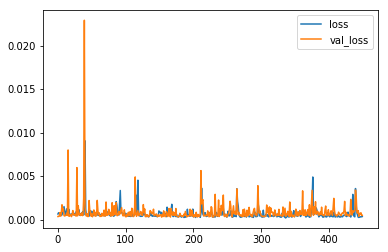

In [133]:
loss[['loss', 'val_loss']].plot()

In [89]:
predict = model.predict(X_test.values)

In [91]:
mean_absolute_error(y_test, predict)

0.007702626980102702

In [92]:
mean_squared_error(y_test,predict)

0.0005019542821854044

In [111]:
new_data = new_corona.drop('Death', axis=1).iloc[3]

In [112]:
new_data

Confirmed    0.587501
Suspected   -0.092831
Recovered    1.446637
month        1.269082
year         0.000000
day         -1.029144
Name: 3, dtype: float64

In [113]:
model.predict(new_data.values.reshape(-1,6))

array([[-0.10309848]], dtype=float32)

In [134]:
new_corona.iloc[3]

Confirmed    0.587501
Suspected   -0.092831
Recovered    1.446637
Death       -0.046913
month        1.269082
year         0.000000
day         -1.029144
Name: 3, dtype: float64

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
s = MinMaxScaler()

,Confirmed,Suspected,Recovered,month,year,day
781,-0.149524,-0.092831,-0.156942,1.269082,0.0,-1.352888
177,-0.149524,-0.092831,-0.156942,1.269082,0.0,-1.110080
1392,-0.153434,-0.092831,-0.156942,-0.787971,0.0,0.751451
628,0.019581,-0.092831,0.150126,1.269082,0.0,-1.271952
86,-0.012676,-0.092831,0.184245,1.269082,0.0,-1.029144
1578,-0.152457,-0.092831,-0.156942,-0.787971,0.0,0.589579
1781,-0.159299,-0.005271,-0.156942,-0.787971,0.0,0.427707
457,-0.154412,-0.092831,-0.156942,1.269082,0.0,-1.271952
54,-0.157344,-0.092831,-0.156942,1.269082,0.0,-1.191016
1412,-0.155389,-0.092831,-0.156942,-0.787971,0.0,0.751451
